In this notebook, I refactor my implementation from `botorch_1.ipynb` to be more modular.

In [1]:
import torch

from molbo.acquisition import LogEI
from molbo.bo import BOLoop
from molbo.models import GPModel
from molbo.utils.functions import Toy1DFunction
from molbo.utils.viz import plot_1d

device = "cuda" if torch.cuda.is_available() else "cpu"
DTYPE = torch.float64
t_params = {
    'device': device,
    'dtype': DTYPE,
}

print(f"Device: {device}\nData type: {DTYPE}")

/home/wvir/miniconda3/envs/molbo/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device: cpu
Data type: torch.float64


In [2]:
# Define the domain, visualize function:
f = Toy1DFunction()

bounds = f.bounds

# Generate 3 random samples
n_init = 3
train_X = bounds[1] * torch.rand(n_init, 1, **t_params)
train_y = f(train_X).unsqueeze(-1)

In [3]:
model = GPModel(train_X, train_y)

bo_loop = BOLoop(
    model=model,
    acquisition=LogEI,
    oracle=f,
    is_continuous=True,
)

X, y = bo_loop.run(n_iters=5)

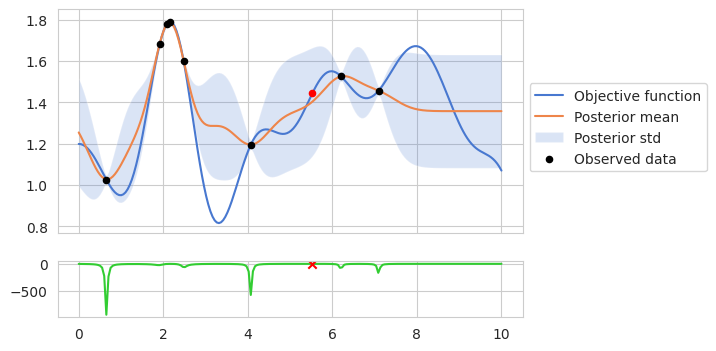

In [4]:
plot_1d(bo_loop)